In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2
%run phasedecoder907.ipynb
from src.folder_handler import *
from src.cort_processor import *
from src.tdt_support import *
from src.plotter import *
from src.decoders import *
import math
import pickle
import scipy as spicy
import numpy as np
import matplotlib.pyplot as plt
from  matplotlib.colors import LinearSegmentedColormap
from src.wiener_filter import *
from matplotlib.pyplot import cm
from scipy import signal


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
with open('/mnt/c/oobootoo/rat-fes/data/pickles/3results-gregintact_729_session.pkl', 'rb') as inp:
    session729 = pickle.load(inp)
rates729 = session729.data['rates']
angles729 = session729.data['angles']
coords729 = session729.data['coords']

with open('/mnt/c/oobootoo/rat-fes/data/pickles/3results-gregintact_818_session.pkl', 'rb') as inp:
    session818 = pickle.load(inp)
rates818 = session818.data['rates']
angles818 = session818.data['angles']
coords818 = session818.data['coords']

with open('/mnt/c/oobootoo/rat-fes/data/pickles/3results-gregintact_825_session.pkl', 'rb') as inp:
    session825 = pickle.load(inp)
rates825 = session825.data['rates']
angles825 = session825.data['angles']
coords825 = session825.data['coords']

with open('/mnt/c/oobootoo/rat-fes/data/pickles/3results-gregintact_901_session.pkl', 'rb') as inp:
    session901 = pickle.load(inp)
rates901 = session901.data['rates']
angles901 = session901.data['angles']
coords901 = session901.data['coords']

In [3]:
with open('/mnt/c/oobootoo/rat-fes/data/pickles/3-results-oldgreginjured_909_session.pkl', 'rb') as inp:
    session909 = pickle.load(inp)
rates909 = session909.data['rates']
angles909 = session909.data['angles']
coords909 = session909.data['coords']

with open('/mnt/c/oobootoo/rat-fes/data/pickles/3-results-oldgreginjured_914_session.pkl', 'rb') as inp:
    session914 = pickle.load(inp)
rates914 = session914.data['rates']
angles914 = session914.data['angles']
coords914 = session914.data['coords']

In [18]:
arctans729, phase_list729, H_sin729, H_cos729, VAF729, sin_array, cos_array, predicted_sin, predicted_cos = phase_train(rates729, angles729)
tsf729 = np.linspace(0, (phase_list729.shape[0]*50)/1000,phase_list729.shape[0])

arctans818, phase_list818, H_sin818, H_cos818, VAF818, sin_array, cos_array, predicted_sin, predicted_cos = phase_train(rates818, angles818)
tsf818 = np.linspace(0, (phase_list818.shape[0]*50)/1000,phase_list818.shape[0])

arctans825, phase_list825, H_sin825, H_cos825, VAF825, sin_array, cos_array, predicted_sin, predicted_cos = phase_train(rates825, angles825)
tsf825 = np.linspace(0, (phase_list825.shape[0]*50)/1000,phase_list825.shape[0])

arctans901, phase_list901, H_sin901, H_cos901, VAF901, sin_array, cos_array, predicted_sin, predicted_cos = phase_train(rates901, angles901)
tsf901 = np.linspace(0, (phase_list901.shape[0]*50)/1000,phase_list901.shape[0])

In [4]:
align729 = align_to_hind(phase_list729, 3)
print(align729)
align818 = align_to_hind(phase_list818, 3)
print(align818)
align825 = align_to_hind(phase_list825, 3)
print(align825)
align901 = align_to_hind(phase_list901, 3)
print(align901)

[ 5. -3.  2.  0. -3. -4. -3.]
[ 4. -3.  1.  0. -3. -4. -3.]
[ 5. -3. -6.  0. -3. -3. -3.]
[ 5. -3.  1.  0. -3. -3. -3.]


In [5]:
align729 = align_to_hind(phase_list729, 1)
print(align729)
align818 = align_to_hind(phase_list818, 1)
print(align818)
align825 = align_to_hind(phase_list825, 1)
print(align825)
align901 = align_to_hind(phase_list901, 1)
print(align901)

[9. 0. 6. 5. 2. 1. 2.]
[9. 0. 5. 5. 2. 1. 2.]
[ 9.  0. -2.  5.  2.  1.  2.]
[9. 0. 6. 5. 2. 1. 2.]


In [24]:
def best_limbfoot(phase_list, limbfoot_roll):
    rank_list = []
    for i in range(4,7):
        mate = np.roll(phase_list[:,i],int(limbfoot_roll[i]))
        rank = vaf(phase_list[:,3],mate)
        rank_list.append(rank)
    print(rank_list)
    best_index = max(range(len(rank_list)), key=rank_list.__getitem__)+3
    return best_index

In [25]:
best_match = best_limbfoot(phase_list729, align729)

<class 'numpy.float64'>
[-1.5523563583723443, -1.3104615673930362, -1.5448662199787098]


In [7]:
arctans909, phase_list909, H_sin909, H_cos909, VAF909, sin_array, cos_array, predicted_sin, predicted_cos = phase_train_injured(rates909, angles909, phase_list901)
tsf909 = np.linspace(0, (phase_list909.shape[0]*50)/1000,phase_list909.shape[0])

arctans914, phase_list914, H_sin914, H_cos914, VAF914, sin_array, cos_array, predicted_sin, predicted_cos = phase_train_injured(rates914, angles914, phase_list901)
tsf914 = np.linspace(0, (phase_list914.shape[0]*50)/1000,phase_list914.shape[0])

<bound method Figure.tight_layout of <Figure size 1200x800 with 4 Axes>>

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
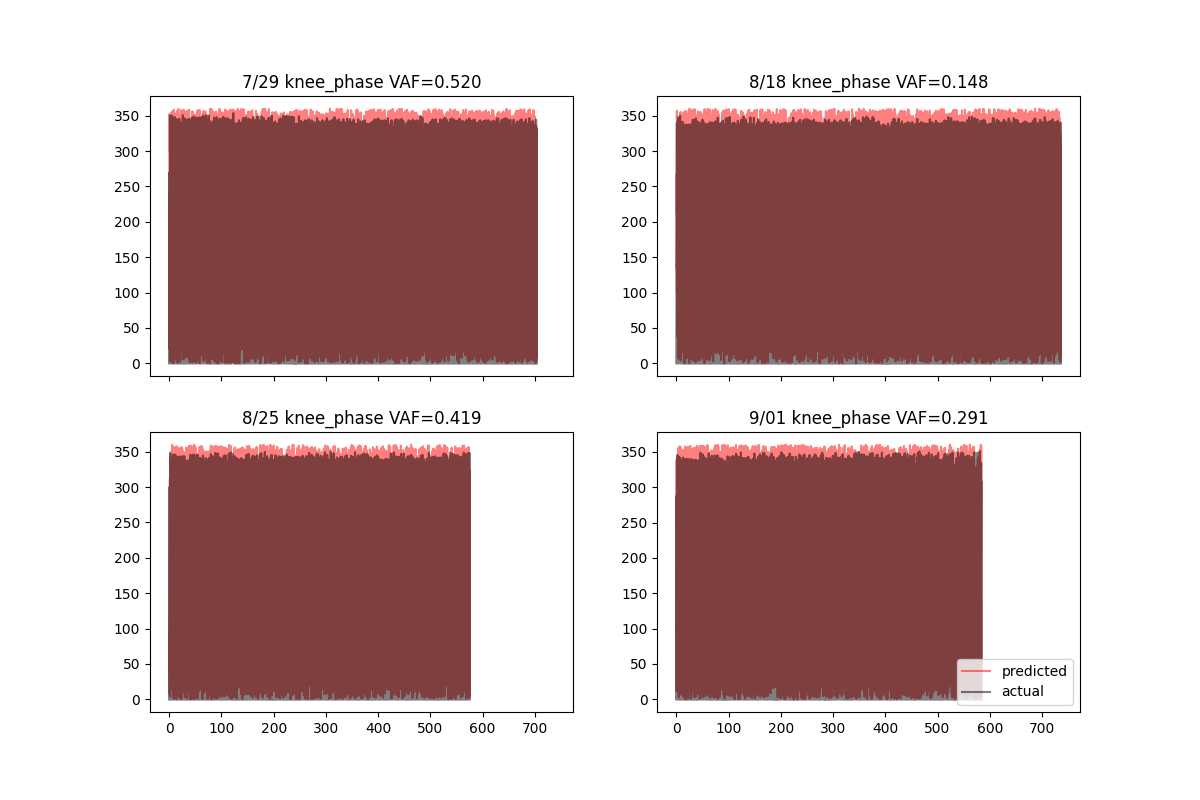

In [19]:
fig512, ax= plt.subplots(2, 2, figsize=(12,8), sharex = True)

ax[0,0].set_title('7/29 knee_phase VAF=' + "{0:.3f}".format(VAF729[1]))
ax[0,0].plot(tsf729, arctans729[:,1], c='r', alpha=0.5, label = "predicted")
ax[0,0].plot(tsf729, phase_list729[:,1], c='k', alpha=0.5, label = "actual")
ax[0,1].set_title('8/18 knee_phase VAF=' + "{0:.3f}".format(VAF818[1]))
ax[0,1].plot(tsf818, arctans818[:,1], c='r', alpha=0.5, label = "predicted")
ax[0,1].plot(tsf818, phase_list818[:,1], c='k', alpha=0.5, label = "actual")
ax[1,0].set_title('8/25 knee_phase VAF=' + "{0:.3f}".format(VAF825[1]))
ax[1,0].plot(tsf825, arctans825[:,1], c='r', alpha=0.5, label = "predicted")
ax[1,0].plot(tsf825, phase_list825[:,1], c='k', alpha=0.5, label = "actual")
ax[1,1].set_title('9/01 knee_phase VAF=' + "{0:.3f}".format(VAF901[1]))
ax[1,1].plot(tsf901, arctans901[:,1], c='r', alpha=0.5, label = "predicted")
ax[1,1].plot(tsf901, phase_list901[:,1], c='k', alpha=0.5, label = "actual")
ax[1,1].legend(loc="lower right")
fig512.tight_layout


<bound method Figure.tight_layout of <Figure size 1200x800 with 4 Axes>>

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
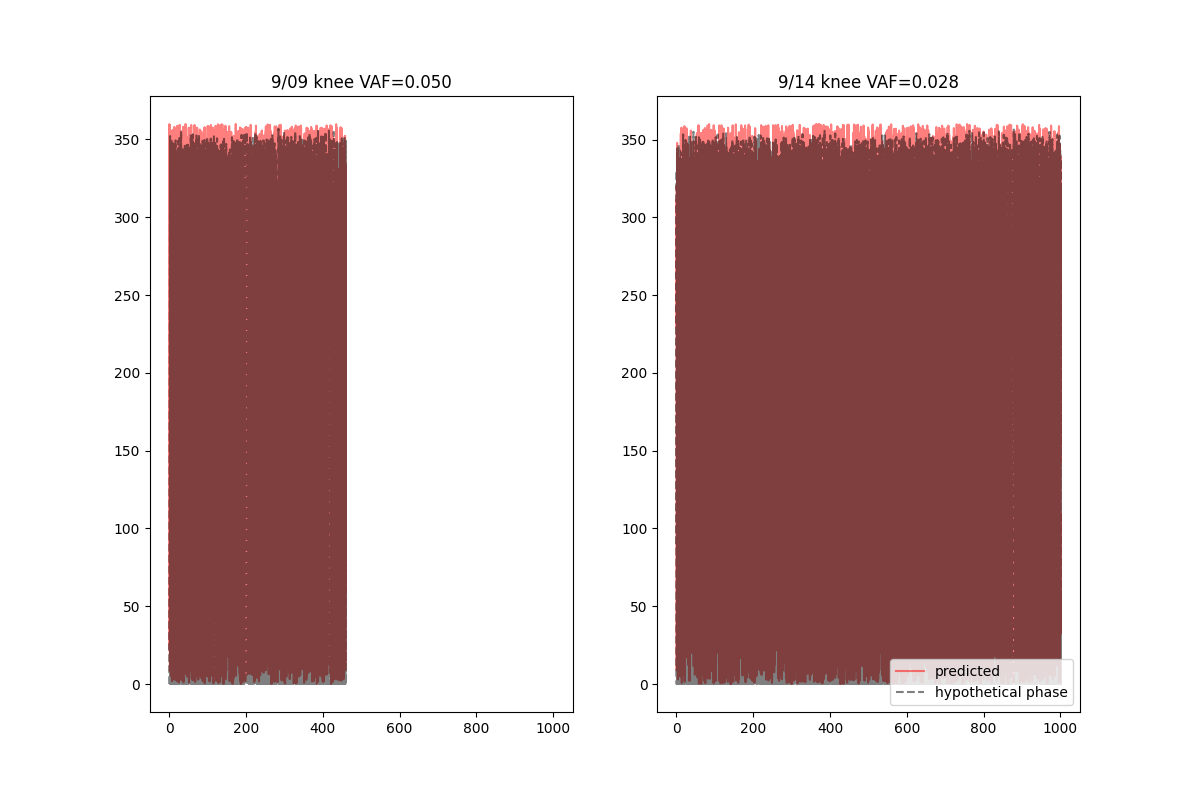

In [20]:
fig513, ax = plt.subplots(1, 2, figsize=(12,8), sharex = True)
ax[0].set_title('9/09 knee VAF=' + "{0:.3f}".format(VAF909[1]))
ax[0].plot(tsf909, arctans909[:,3], c='r', alpha=0.5, label = "predicted")
ax[0].plot(tsf909, phase_list909[:,3], c='k',linestyle='--', alpha=0.5, label = "hypothetical phase")
ax[1].set_title('9/14 knee VAF=' + "{0:.3f}".format(VAF914[1]))
ax[1].plot(tsf914, arctans914[:,3], c='r', alpha=0.5, label = "predicted")
ax[1].plot(tsf914, phase_list914[:,3], c='k',linestyle='--', alpha=0.5, label = "hypothetical phase")
ax[1].legend(loc="lower right")
fig512.tight_layout
